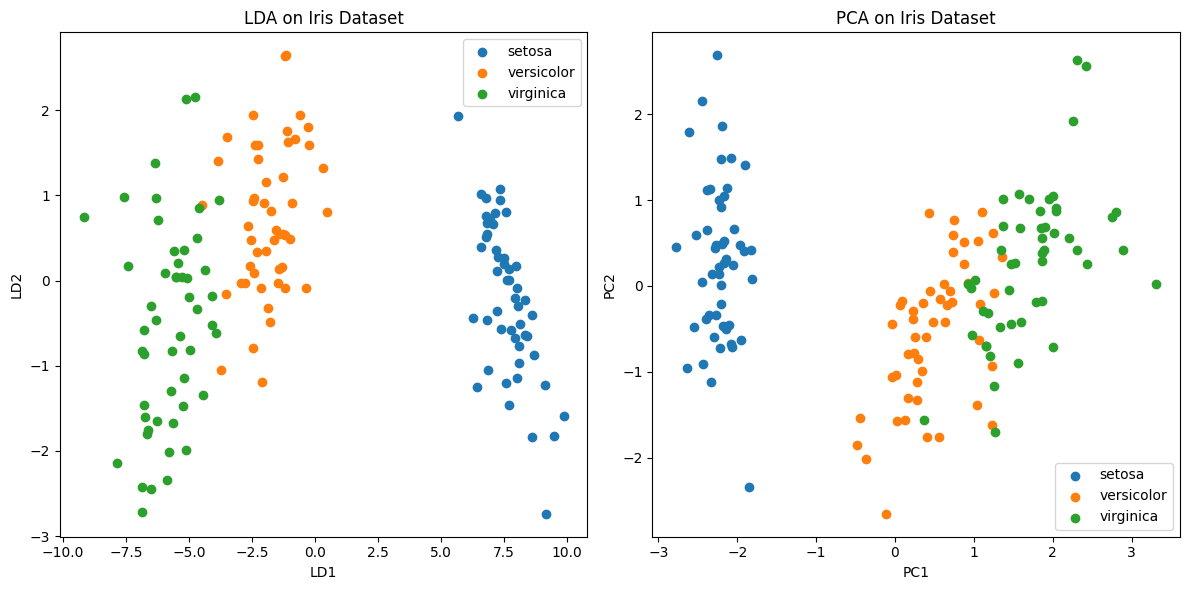

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('iris.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_encoded)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, species in zip(range(len(encoder.classes_)), encoder.classes_):
    plt.scatter(X_lda[y_encoded == i, 0], X_lda[y_encoded == i, 1], label=species)
plt.title('LDA on Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

plt.subplot(1, 2, 2)
for i, species in zip(range(len(encoder.classes_)), encoder.classes_):
    plt.scatter(X_pca[y_encoded == i, 0], X_pca[y_encoded == i, 1], label=species)
plt.title('PCA on Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.tight_layout()
plt.show()
